<a href="https://colab.research.google.com/github/alsmcc/ML_and_CA/blob/master/Fast_AI_CIFAR_10_Benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision import *
import random


In [ ]:
path = untar_data(URLs.CIFAR)


In [ ]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, valid='test', ds_tfms=tfms)
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.fit(3)


epoch,train_loss,valid_loss,accuracy,time
0,1.420323,1.283146,0.575300,01:27
1,1.182209,0.994591,0.656600,01:28
2,1.011571,0.863272,0.703500,01:27


In [ ]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, valid='test', ds_tfms=tfms, size=224)
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.fit(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.346724,0.219369,0.927300,07:42
1,0.260095,0.190971,0.936300,07:37
2,0.233375,0.155644,0.948000,07:20


In [ ]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, valid='test', ds_tfms=tfms, size=128)
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.fit(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.364329,0.226299,0.925000,02:41
1,0.285393,0.193924,0.934900,02:44
2,0.231550,0.171130,0.941100,02:48


In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


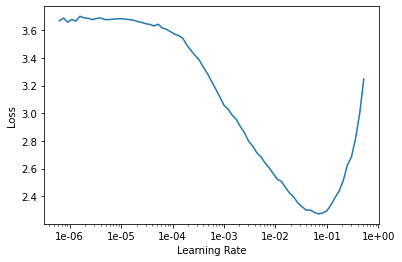

In [ ]:
learn.recorder.plot()

In [ ]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, valid='test', ds_tfms=tfms, size=128)
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.fit_one_cycle(3, max_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.376456,0.234884,0.923700,02:39
1,0.243331,0.156422,0.946800,02:44
2,0.181446,0.142273,0.951900,02:46


In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


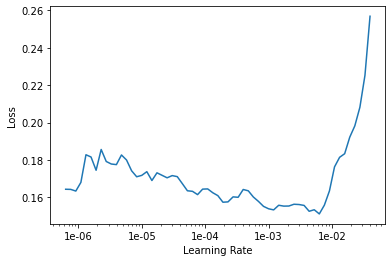

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.165572,0.139392,0.953900,02:53
1,0.156197,0.130671,0.955600,02:52
2,0.107842,0.126958,0.956000,02:50


In [ ]:
preds,targs = learn.TTA()
accuracy(preds, targs).item()

0.9614999890327454

In [ ]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, valid='test', ds_tfms=tfms, size=128)
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.fit_one_cycle(10, max_lr=1e-3)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.560709,0.332759,0.893200,03:23
1,0.285502,0.194705,0.934000,03:32
2,0.265833,0.182600,0.938100,03:24
3,0.220540,0.172503,0.941100,03:24
4,0.193725,0.157282,0.947200,03:23
5,0.170741,0.142540,0.951100,03:19
6,0.140521,0.142629,0.952600,03:17
7,0.116149,0.132312,0.956700,03:19
8,0.100400,0.128758,0.957800,03:16
9,0.096631,0.126989,0.957800,03:13


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.101970,0.127526,0.957800,03:38
1,0.104971,0.130870,0.956100,03:41
2,0.087677,0.122497,0.959700,03:42
3,0.071681,0.120776,0.960600,03:43
4,0.058219,0.123343,0.962000,03:44
5,0.050645,0.123766,0.962800,03:45
6,0.043378,0.121074,0.965200,03:45
7,0.037919,0.121295,0.964900,03:44
8,0.030689,0.120607,0.965800,03:42
9,0.031660,0.121572,0.965700,03:41


In [ ]:
preds,targs = learn.TTA()
accuracy(preds, targs).item()

0.9689000248908997